## Weight Initialization

Major obstracles in training DNNs is the **vanishing** and **exploding gradient** problems.

* **Vanishing Gradient Problem**
      This occurs when the gradients of the loss function with respect to the weights of the early layers become vanishingly small. As a result, the ealy layers receive little or no updated weight information during backpropagation, leading to slow convergence or even stagnation.
  
* **Exploding Gradient Problem**
      This occurs when the gradients of the loss function with respect to the weights of the early layers become significanly large or even NaN. As a result, the early layers receive big updated weight information during backpropagation, leading to slow convergence or divergence.

*further readings*:
* [Vanishing Gradient Problem in Deep Learning: Understanding, Intuition, and Solutions](https://medium.com/@amanatulla1606/vanishing-gradient-problem-in-deep-learning-understanding-intuition-and-solutions-da90ef4ecb54)
* [The Challenge of Vanishing/Exploding Gradients in Deep Neural Networks](https://www.analyticsvidhya.com/blog/2021/06/the-challenge-of-vanishing-exploding-gradients-in-deep-neural-networks/)
* [A Gentle Introduction To Weight Initialization for Neural Networks](https://wandb.ai/sauravmaheshkar/initialization/reports/A-Gentle-Introduction-To-Weight-Initialization-for-Neural-Networks--Vmlldzo2ODExMTg)

### Simulate vanishing and exploding gradient problem

In [29]:
import torch
from torch import nn

In [6]:
X = torch.randn(60,30)
W = torch.randn(30,30)
for i in range(50):
    X = X @ W.T
X

tensor([[ 1.5947e+36,  1.7718e+36, -4.5730e+36,  ...,  6.3253e+36,
         -4.8529e+36,  4.3941e+36],
        [-1.2457e+36, -4.4515e+36,  6.6304e+35,  ..., -5.7152e+36,
          3.2220e+36,  4.1058e+36],
        [-5.9455e+35,  1.6846e+36,  1.6542e+36,  ..., -8.6226e+35,
          1.1515e+36, -4.2758e+36],
        ...,
        [-1.9789e+36,  7.9122e+36, -1.8352e+36,  ..., -9.5552e+35,
          1.6852e+35, -4.5731e+36],
        [ 1.0915e+36,  2.8665e+36,  1.5061e+36,  ...,  2.3704e+36,
         -1.4535e+36, -3.7112e+36],
        [-3.8174e+35, -3.5572e+36,  3.6920e+36,  ..., -7.3572e+36,
          3.4605e+36,  2.3927e+36]])

Keep multiplying X by W resulting in large or small values, i.e. absolute number of values gets larger and larger.

When W is small:

In [8]:
X = torch.randn(60,30)
W = torch.randn(30,30) * 0.01 # small weight
for i in range(50):
    X = X @ W.T
X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

The values of X vanish as X is multipled by a small W multiple times. 

Thus, Proper initialization can help in maintaining numerical stability and can significantly impact the convergence and performance of the network.

Two approaches for initializing the weights are introduced here.

* **Xavier initialization**
* **Kaiming Initialization**

### Xavier Initialization

This is effective for sigmoid or tanh fucntion but not effective for ReLU function.

* **Normal Xavier Initialization**
  Initial weights are drawn them from a normal distribution with a mean of 0 and a specific standard deviation, which is calculated by
  
  $$\sigma = \sqrt{\frac{2}{n_{in}+n_{out}}}$$

  For each weight in netwrok, a random value w is drawn from a normal distribution with mean 0, standard deviation $\sigma$
  $$W\sim N(0, \frac{2}{n_{in}+n_{out}})$$

     cf. The normal distribution that has mean $\mu$ and variance $\sigma^2$ is written as $$N(\mu, \sigma^2)$$

  
  
* **Uniform Xavier Initialization**
  Initialize the weights are drawn from a random uniform distribution within a specific range, which is determined by the formula:

  $$x = \sqrt {\frac {6}{n_{inputs}\,+\,n_{outputs}}} $$

  For each weight in network, a random value w is drawn from a uniform distribution in the range [-x,x]

  $$W\sim u(-\sqrt{\frac{6}{n_{in}+n_{out}}} , \sqrt{\frac{6}{n_{in}+n_{out}}})$$

In [37]:
X = torch.randn(60,30)
n_out, n_in = 30, 30

#normal distribution
sigma = torch.sqrt(torch.tensor(2.)/(n_in+n_out))
for i in range(50):
    W = torch.normal(mean=0, std=sigma, size=(n_out,n_in))
    X = X @ W.T
    
print(X.min(), X.max(), X.median(), X.mean())

tensor(-1.6011) tensor(1.6621) tensor(0.0030) tensor(-9.2122e-06)


### Kaiming Initialization (Kaiming He initialization)

Since Xavier initialization may not effectively prevent vanishing or exploding gradient problem in deep networks, expecially those using ReLU activation functions.

  Initial weights are drawn them from a normal distribution with a mean of 0 and a standard deviation of $\sqrt{\frac{2}{n}}$.
  
  $$W\sim N(0, \frac{2}{n_{in}})$$
  
The factor of 2 in the variance is specific to the ReLU actionvation fuction. 

*further reading*
* [Xavier initialization](https://www.geeksforgeeks.org/xavier-initialization/)
* [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/abs/1502.01852) by Kaiming He
* [Kaiming Initialization in Deep Learning](https://www.geeksforgeeks.org/kaiming-initialization-in-deep-learning/)

In [39]:
X = torch.randn(60,30)
n_out, n_in = 30, 30

#normal distribution
sigma = torch.sqrt(torch.tensor(2.)/n_in)
for i in range(50):
    W = torch.normal(mean=0, std=sigma, size=(n_out,n_in))
    X = X @ W.T
    
    #relu
    X = torch.clamp(X, min=0)
    
print(X.min(), X.max(), X.median(), X.mean())

tensor(0.) tensor(0.4043) tensor(0.0314) tensor(0.0537)


### Kaiming Initialization in PyTorch

`torch.nn.init.kaming_normal_`(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu', generator=None)

**Parameters**:
* **tensor** (Tensor) – an n-dimensional torch.Tensor

* **a** (float) – the negative slope of the rectifier used after this layer (only used with 'leaky_relu')

* **mode** (str) – either 'fan_in' (default) or 'fan_out'. Choosing 'fan_in' preserves the magnitude of the variance of the weights in the forward pass. Choosing 'fan_out' preserves the magnitudes in the backwards pass.

* **nonlinearity** (str) – the non-linear function (nn.functional name), recommended to use only with 'relu' or 'leaky_relu' (default).

* **generator** (Optional[Generator]) – the torch Generator to sample from (default: None)

Examples:

```python
    w = torch.empty(3, 5)
    nn.init.kaiming_normal_(w, mode='fan_out', nonlinearity='relu')
```

In [43]:
conv = nn.Conv2d(1,8, kernel_size=3, stride=2, padding=1)
print(conv.weight.mean(), conv.weight.std()) # default std=np.sqrt(1/3*n_in*k*k)
nn.init.kaiming_normal_(conv.weight)
print(conv.weight.mean(), conv.weight.std()) # kaiming std=np.sqrt(2/n_in*k*k)

tensor(0.0349, grad_fn=<MeanBackward0>) tensor(0.2081, grad_fn=<StdBackward0>)
tensor(0.0242, grad_fn=<MeanBackward0>) tensor(0.4921, grad_fn=<StdBackward0>)


### Batch normalization + Kaiming init

In [55]:
from functools import partial

import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.nn import init
from torch.nn import functional as F
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

%load_ext autoreload 
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
def get_conv_model():
    return nn.Sequential(
        # 1x28x28
        nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(4),
        nn.ReLU(),
        # 4x14x14
        nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(8),            
        nn.ReLU(),
        # 8x7x7
        nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        # 16x4x4
        nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),

        nn.AdaptiveAvgPool2d(1),
        nn.Flatten(),
        nn.Linear(32, 10)

    )

In [62]:
conv_model = get_conv_model()

In [63]:
for layer in conv_model:
    if isinstance(layer, nn.Linear) or isinstance(layer, nn.Conv2d):
        init.kaiming_normal_(layer.weight)

In [64]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,),std=(0.5,))
])
train_dataset = torchvision.datasets.FashionMNIST('./data/fmnist_dataset', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.FashionMNIST('./data/fmnist_dataset', train=False, download=True, transform=transform)

batch_size=1024
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=6)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=6)

opt = optim.SGD(conv_model.parameters(), lr=0.3,)
act_stats = utils.ActivationStatistics(conv_model)

num_epoch = 3
train_losses, val_losses, val_accuraccies = utils.learn(conv_model,train_loader, val_loader, opt, F.cross_entropy, num_epoch=num_epoch)


epoch: 0: train error: 1.172147414441836, validation error: 0.7609965145587921, validation accuracy: 0.7431042730808258


epoch: 1: train error: 0.6247780201798778, validation error: 0.5812082052230835, validation accuracy: 0.7936842322349549


epoch: 2: train error: 0.511375176199412, validation error: 0.5160920858383179, validation accuracy: 0.8097895383834839


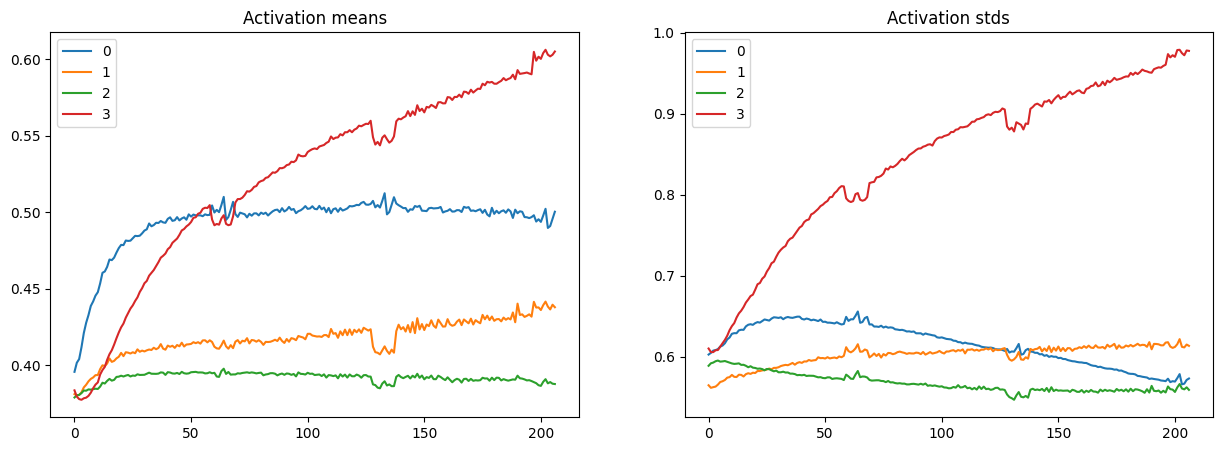

In [65]:
act_stats.plot_statistics()